In [1]:
import pandas as mypd
import matplotlib.pyplot as myplot 
from pandas.tools.plotting import scatter_matrix
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [2]:
mydata = mypd.read_csv("/Users/harisuriya/Desktop/mlworkshop/Data/Mult_reg_Yield.csv")


In [3]:
mydata

,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7
5,194,192,82.0
6,143,220,34.5
7,186,235,95.4
8,139,240,56.7
9,188,230,84.4


/Users/harisuriya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


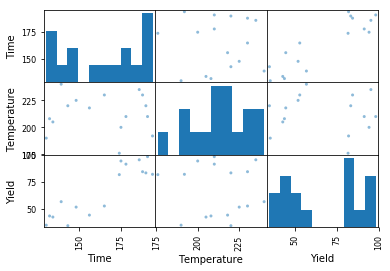

In [4]:
scatter_matrix(mydata)
myplot.show()

In [5]:

time = mydata.Time
temp = mydata.Temperature
output = mydata.Yield


In [6]:
mymodel=ols("output~time+temp",data = mydata).fit()

In [7]:
mymodel.summary()

/Users/harisuriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     27.07
Date:                Tue, 26 Jun 2018   Prob (F-statistic):           2.32e-05
Time:                        00:38:41   Log-Likelihood:                -59.703
No. Observations:                  16   AIC:                             125.4
Df Residuals:                      13   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.8844     40.587     -1.673      0.118    -155.566      19.797
time           0.9061      0.123      7.344      0.000       0.640       1.173
temp          -0.0642      0.164     -0.392      0.702      -0.418       0.290
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                0.970
Skew:                          -0.078   Prob(JB):                        0.616
Kurtosis:                       1.804   Cond. No.                     3.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

yield=-67.8844+0.9061time-0.0642


In [8]:
mymodel=ols("output~time",data = mydata).fit()
mymodel.summary()

/Users/harisuriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     57.46
Date:                Tue, 26 Jun 2018   Prob (F-statistic):           2.55e-06
Time:                        00:38:56   Log-Likelihood:                -59.797
No. Observations:                  16   AIC:                             123.6
Df Residuals:                      14   BIC:                             125.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -81.6205     19.791     -4.124      0.001    -124.067     -39.174
time           0.9065      0.120      7.580      0.000       0.650       1.163
==============================================================================
Omnibus:                        1.894   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                0.969
Skew:                          -0.127   Prob(JB):                        0.616
Kurtosis:                       1.822   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
pred = mymodel.predict()

In [10]:
pred

array([ 36.21847208,  76.10244198,  39.84428752,  91.51215763,
        67.94435723,  94.23151921,  48.00237228,  86.97988832,
        44.37655683,  88.79279604,  77.00889584,  59.78627247,
        90.60570376,  79.72825743,  38.0313798 ,  52.53464158])

residual = actual value - predicted value

In [11]:
res=output-pred

In [12]:
res

0     -1.218472
1      5.597558
2      2.655712
3      6.787842
4    -15.244357
5    -12.231519
6    -13.502372
7      8.420112
8     12.323443
9     -4.392796
10    17.291104
11   -15.486272
12    -7.305704
13    11.671743
14     5.468620
15    -0.834642
Name: Yield, dtype: float64

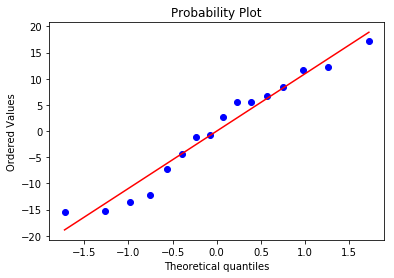

In [13]:

from scipy import stats
stats.probplot(res,plot=myplot)
myplot.show()

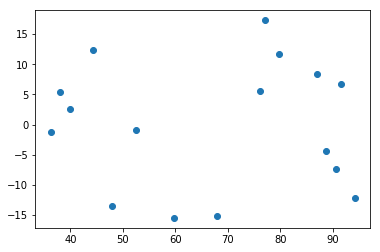

In [14]:
myplot.scatter(pred,res)
myplot.show()

Model adequacy check
Residuals Vs Independent variables
     

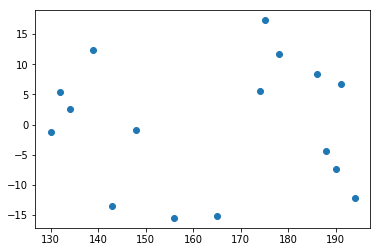

In [17]:
myplot.scatter(time, res)
myplot.show() 
